# Zero-Shot Object Detection and Tracking with Grounding DINO

---

[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/zero-shot-object-detection-with-grounding-dino.ipynb) [![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/cMa77r3YrDk) [![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/IDEA-Research/GroundingDINO) [![arXiv](https://img.shields.io/badge/arXiv-2303.05499-b31b1b.svg)](https://arxiv.org/abs/2303.05499)

Grounding DINO can detect **arbitrary objects** with human inputs such as category names or referring expressions. The key solution of open-set object detection is introducing language to a closed-set detector DINO. for open-set concept generalization. If you want to learn more visit official GitHub [repository](https://github.com/IDEA-Research/GroundingDINO) and read the [paper](https://arxiv.org/abs/2303.05499).

![grounding dino figure](https://media.roboflow.com/notebooks/examples/grounding-dino-figure.png)

## ⚠️ Disclaimer

Grounding DINO codebase is still under development. If you experience any problems with launching the notebook, please let us know and create [issues](https://github.com/roboflow/notebooks/issues) on our GitHub.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install Grounding DINO 🦕
- Download Grounding DINO Weights 🏋️
- Download Example Data
- Load Grounding DINO Model
- Grounding DINO Demo
- Grounding DINO with Roboflow Dataset
- 🏆 Congratulations

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Fri Mar 31 18:16:18 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import torch

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install Grounding DINO 🦕 

In [4]:
%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!pip install -q -e .


/content
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 197, done.
remote: Counting objects: 100% (197/197), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 197 (delta 85), reused 165 (delta 57), pack-reused 0
Receiving objects: 100% (197/197), 8.73 MiB | 29.03 MiB/s, done.
Resolving deltas: 100% (85/85), done.
/content/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.2/190.2 KB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 74.7 MB/s eta 0:00:00


In [4]:
import os

CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


## Download Grounding DINO Weights 🏋️

In [6]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/content
/content/weights


In [5]:
import os

WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join(HOME, "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

/content/weights/groundingdino_swint_ogc.pth ; exist: True


## Download Example Data

## Load Grounding DINO Model

In [ ]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model(CONFIG_PATH, WEIGHTS_PATH)

In [7]:
torch.cuda.is_available()


True

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!git clone "https://github.com/mikel-brostrom/yolov8_tracking.git"

In [ ]:
!git clone --recurse-submodules https://github.com/healthonrails/yolov8_tracking.git

In [9]:
%cd /content/GroundingDINO/yolov8_tracking/
%pip install -qr requirements.txt

/content/GroundingDINO/yolov8_tracking


In [10]:
from trackers.multi_tracker_zoo import create_tracker

In [ ]:
%pip install ultralytics

In [40]:
tracking_method = 'ocsort'
tracking_config = f"/content/GroundingDINO/yolov8_tracking/trackers/{tracking_method}/configs/{tracking_method}.yaml"
reid_weights = 'osnet_x0_25_msmt17.pt'
device = 0
half = True
tracker = create_tracker(tracking_method, tracking_config, reid_weights, device, half)

In [41]:
if hasattr(tracker, 'model'):
    if hasattr(tracker.model, 'warmup'):
        tracker.model.warmup()

In [42]:
import numpy as np


In [14]:
def convert_bboxes(boxes,logits):
    bboxes = []
    for box, class_score in zip(boxes,logits):
        box = list(box.cpu().numpy())
        box.append(class_score.cpu().item())
        box.append(0) # class
        bboxes.append(box)
    return np.array(bboxes)
    

In [43]:
from torchvision.ops import box_convert
from typing import Tuple, List
import cv2
def annotate(image_source: np.ndarray, boxes: torch.Tensor, logits: torch.Tensor, phrases: List[str]) -> np.ndarray:
    h, w, _ = image_source.shape
    boxes = boxes * torch.Tensor([w, h, w, h])
    #xyxy = box_convert(boxes=boxes, in_fmt="cxcywh", out_fmt="xyxy").numpy()
    bbox_xyxy = box_convert(boxes=boxes, in_fmt="cxcywh", out_fmt="xyxy")
    xyxy = bbox_xyxy.numpy()
    detections = sv.Detections(xyxy=xyxy)
    ids = np.hstack((xyxy, logits.reshape(-1, 1), logits.reshape(-1, 1)))
    ids = tracker.update(ids,_)
    labels = [
        f"{phrase} {logit:.2f} ID:{int(id[4])}"
        for phrase, logit, id
        in zip(phrases, logits, ids)
    ]
    box_annotator = sv.BoxAnnotator()
    annotated_frame = cv2.cvtColor(image_source, cv2.COLOR_RGB2BGR)
    annotated_frame = box_annotator.annotate(scene=annotated_frame, detections=detections, labels=labels)
    return annotated_frame

## Grounding DINO Demo

/usr/local/lib/python3.9/dist-packages/transformers/modeling_utils.py:830: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


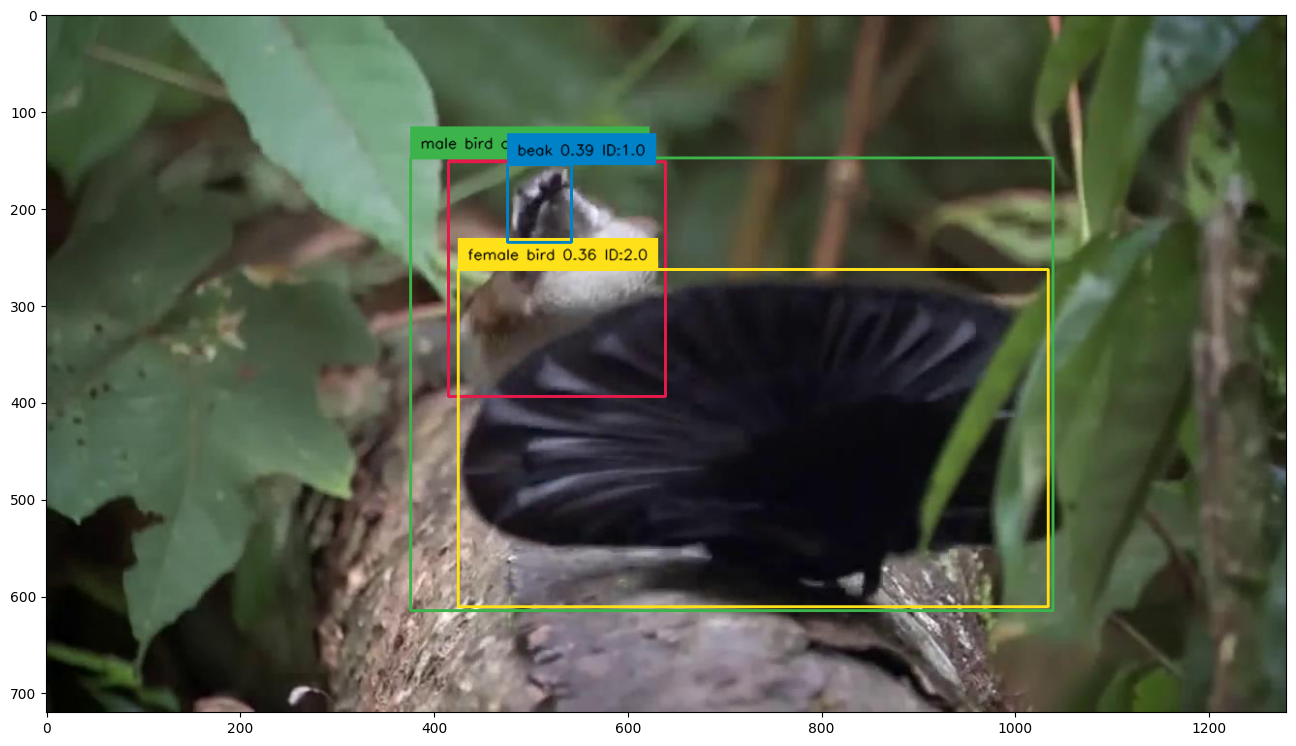

In [22]:
import os
import supervision as sv
import torch
IMAGE_NAME = "/content/data/birds_dance_bbc_000003144.jpg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

TEXT_PROMPT = "eye. beak. head. female bird . male bird dance"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model, 
    image=image, 
    caption=TEXT_PROMPT, 
    box_threshold=BOX_TRESHOLD, 
    text_threshold=TEXT_TRESHOLD,
    device='cpu' if not torch.cuda.is_available() else 'cuda'
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

%matplotlib inline  
sv.show_frame_in_notebook(annotated_frame, (16, 16))

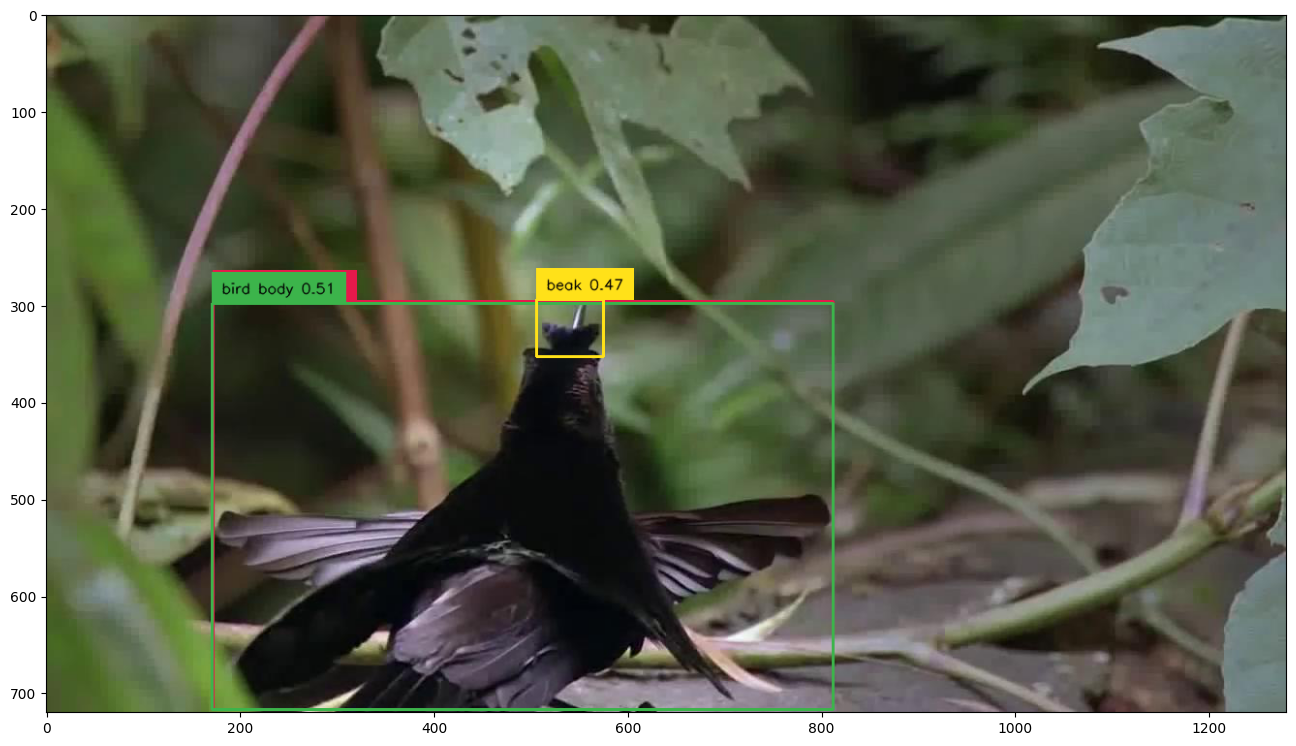

In [15]:
import os
import supervision as sv

IMAGE_NAME = "/content/birds_dance_bbc_000002754.jpg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

TEXT_PROMPT = "bird dance,beak,bird body"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model, 
    image=image, 
    caption=TEXT_PROMPT, 
    box_threshold=BOX_TRESHOLD, 
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

%matplotlib inline  
sv.show_frame_in_notebook(annotated_frame, (16, 16))

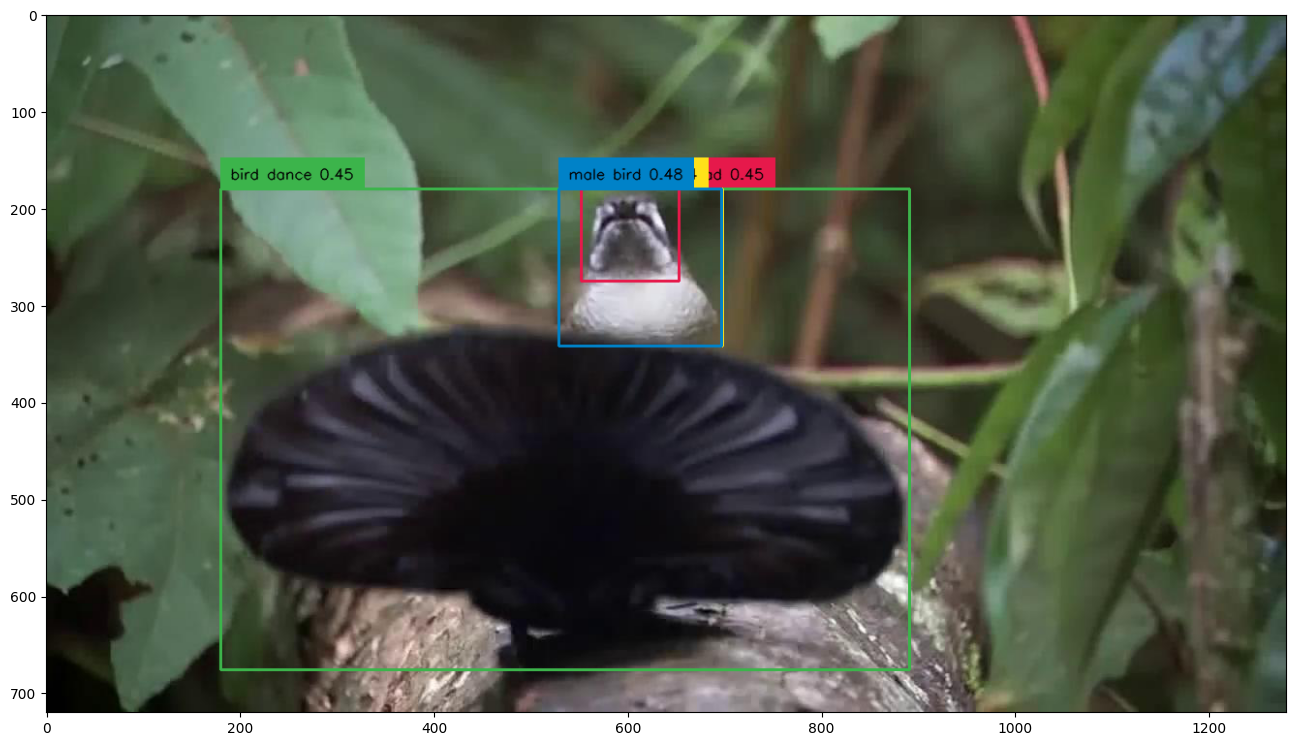

In [18]:
import os
import supervision as sv
%matplotlib inline 
IMAGE_NAME = "/content/birds_dance_bbc_000003104.jpg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

TEXT_PROMPT = "bird dance, female bird, female bird head,male bird"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model, 
    image=image, 
    caption=TEXT_PROMPT, 
    box_threshold=BOX_TRESHOLD, 
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

%matplotlib inline  
sv.show_frame_in_notebook(annotated_frame, (16, 16))

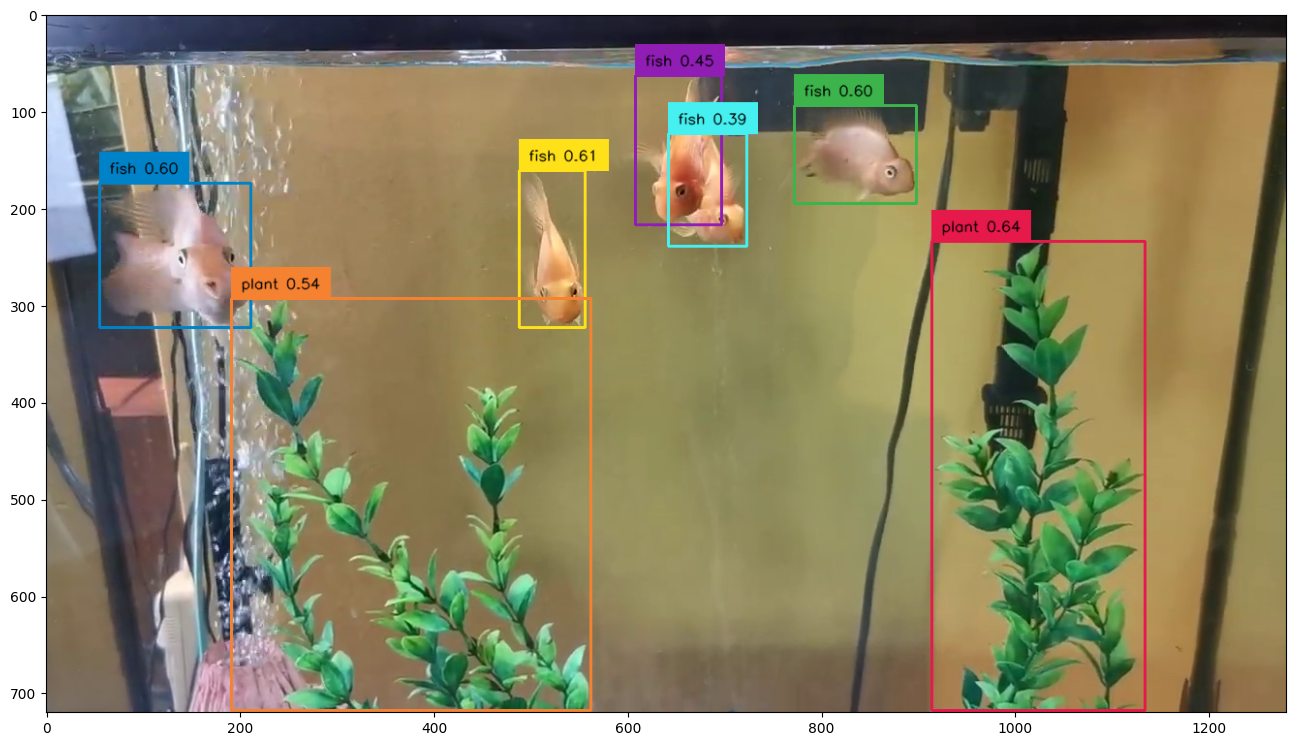

In [ ]:
import os
import supervision as sv

IMAGE_NAME = "/content/fish_000000650.png"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

TEXT_PROMPT = "fish,water,plant"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model, 
    image=image, 
    caption=TEXT_PROMPT, 
    box_threshold=BOX_TRESHOLD, 
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

%matplotlib inline  
sv.show_frame_in_notebook(annotated_frame, (16, 16))

/usr/local/lib/python3.9/dist-packages/transformers/modeling_utils.py:830: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


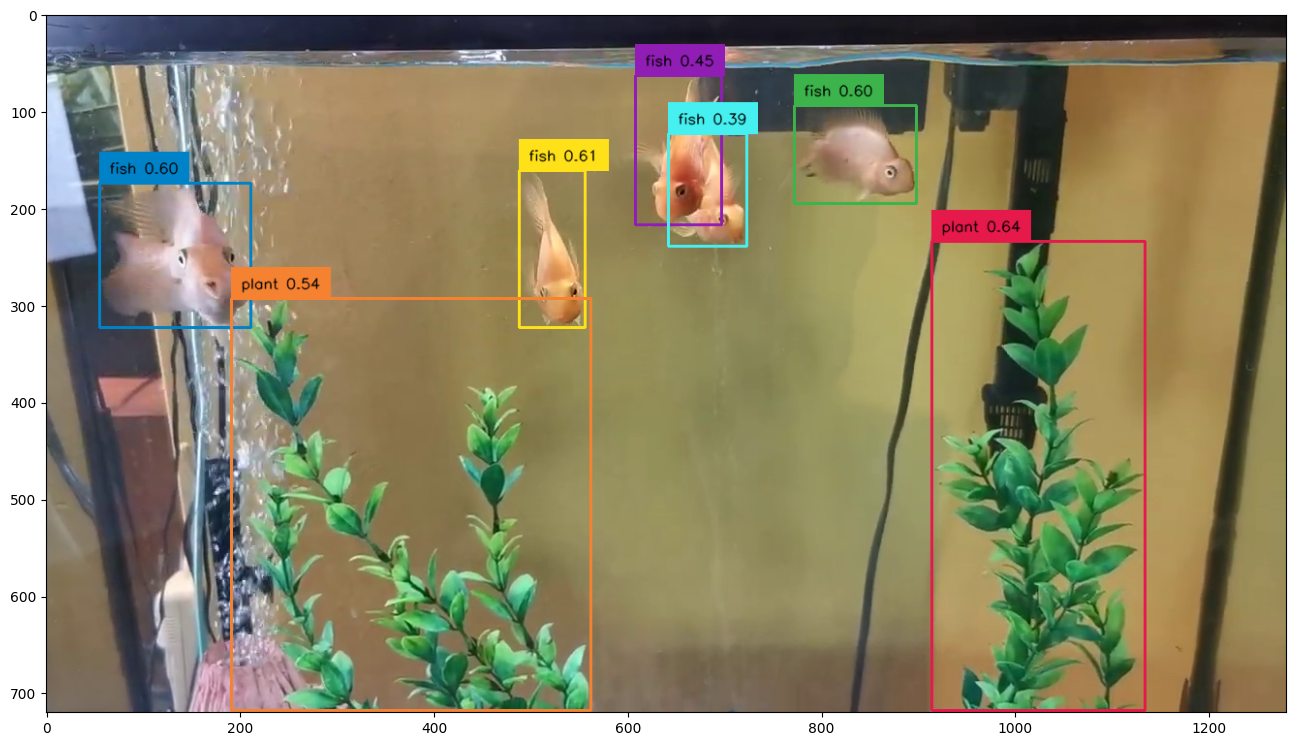

In [11]:
import os
import supervision as sv

IMAGE_NAME = "/content/fish_000000650.png"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

TEXT_PROMPT = "fish,water,plant"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model, 
    image=image, 
    caption=TEXT_PROMPT, 
    box_threshold=BOX_TRESHOLD, 
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

%matplotlib inline  
sv.show_frame_in_notebook(annotated_frame, (16, 16))

In [27]:
import torch
import cv2
import numpy as np
from typing import Tuple
import supervision as sv
import groundingdino.datasets.transforms as T

def load_cv2_image(cv2_image) -> Tuple[np.array, torch.Tensor]:
    transform = T.Compose(
        [
            #T.RandomResize([800], max_size=1333),
            T.ToTensor(),
            T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    )
    #image_source = cv2.cvtColor(cv2_image, cv2.COLOR_BGR2RGB)
    image_transformed, _ = transform(cv2_image, None)
    return cv2_image, image_transformed

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
TEXT_PROMPT = "fish.shark.sardines.school of fish" #@param
VIDEO_FILE = "/content/fish_sea.mp4" #@param
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25
# Open the video file
vidcap = cv2.VideoCapture(VIDEO_FILE)
# Get the video dimensions and FPS
width = int(vidcap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(vidcap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(vidcap.get(cv2.CAP_PROP_FPS))

# Define the output video file
out = cv2.VideoWriter(VIDEO_FILE.replace('.mp4','_output.mp4'), cv2.VideoWriter_fourcc(*'MP4V'), fps, (width, height), isColor=True)

counter = 0
# Read the first frame
success, image = vidcap.read()

# Loop through the frames
while success:
    # Display the current frame
    #cv2_imshow(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_source, image = load_cv2_image(image)
    boxes, logits, phrases = predict(
    model=model, 
    image=image, 
    caption=TEXT_PROMPT, 
    box_threshold=BOX_TRESHOLD, 
    text_threshold=TEXT_TRESHOLD)

    annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)
    out.write(annotated_frame)
    if counter % 100 == 0:
        print('Processed frame number: ', counter)
        sv.show_frame_in_notebook(annotated_frame, (16, 16))
    # Wait for a key press (in milliseconds)
    # Adjust the delay time to control the playback speed
    key = cv2.waitKey(25)
    
    # Exit the loop if the 'q' key is pressed
    if key == ord('q'):
        break
    
    # Read the next frame
    success, image = vidcap.read()
    counter += 1

# Release the video file and close the window
vidcap.release()
out.release()
cv2.destroyAllWindows()
